### CUSTOMER SEGMENTATION USING KMEANS

### IMPORT LIBRARIES

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

### LOAD DATA FROM CSV FILE

In [2]:
df = pd.read_csv("customers.csv")
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [4]:
df.shape

(850, 10)

### PRE-PROCESSING

In [5]:
df = df[["Age", "Income"]]
df.head()

,Age,Income
0,41,19
1,47,100
2,33,57
3,29,19
4,47,253


In [6]:
# STANDARDIZE DATA
from sklearn.preprocessing import scale
df["Age"] = scale(df["Age"])
df["Income"] = scale(df["Income"])
df.head()

C:\Users\nagal\AppData\Local\Temp\ipykernel_29132\3827325045.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Age"] = scale(df["Age"])
C:\Users\nagal\AppData\Local\Temp\ipykernel_29132\3827325045.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Income"] = scale(df["Income"])


,Age,Income
0,0.742915,-0.718459
1,1.489490,1.384325
2,-0.252518,0.268032
3,-0.750235,-0.718459
4,1.489490,5.356249


### MODELING

In [10]:
clusterNum = 5
k_means = KMeans(n_clusters = clusterNum)
k_means.fit(df)
labels = k_means.labels_
print(labels[:100])

[0 2 0 1 4 2 0 3 1 2 2 0 1 3 1 1 1 3 3 0 1 0 1 3 2 3 1 0 0 0 2 3 1 0 1 0 0
 0 1 2 1 2 1 2 3 2 1 1 1 1 3 0 1 3 0 0 1 1 0 3 0 0 0 3 1 0 0 1 0 1 0 0 0 1
 1 0 3 0 2 3 0 0 2 0 3 1 1 1 1 1 0 0 1 1 0 3 0 0 0 1]


### INSIGHTS

### we assign the labels to each row in dataframe

In [11]:
df["cluster"] = labels
df.head()

C:\Users\nagal\AppData\Local\Temp\ipykernel_29132\905466782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["cluster"] = labels


,Age,Income,cluster
0,0.742915,-0.718459,0
1,1.489490,1.384325,2
2,-0.252518,0.268032,0
3,-0.750235,-0.718459,1
4,1.489490,5.356249,4


### we can easily check the values by averaging the features in each cluster

In [12]:
df.groupby("cluster").mean()

,Age,Income
cluster,,
0,0.110702,-0.122464
1,-1.010015,-0.516798
2,1.053988,1.808460
3,1.417358,0.077281
4,1.439719,5.820938


In [13]:
k_means.cluster_centers_

array([[ 0.11070241, -0.12246416],
       [-1.01001482, -0.51679843],
       [ 1.05398836,  1.80845966],
       [ 1.41735764,  0.07728066],
       [ 1.43971882,  5.82093781]])

In [14]:
df.cluster.value_counts()

1    319
0    309
3    138
2     74
4     10
Name: cluster, dtype: int64

### Now, lets look at the distribution of customers based on their age and income

In [15]:
centers = k_means.cluster_centers_

Text(0, 0.5, 'Income')

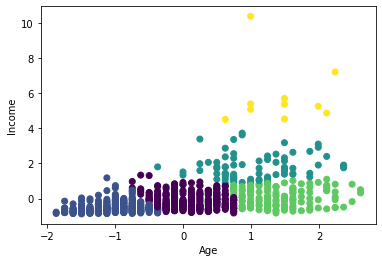

In [17]:
plt.scatter(df["Age"], df["Income"], c = labels.astype(float))
plt.xlabel("Age")
plt.ylabel("Income")

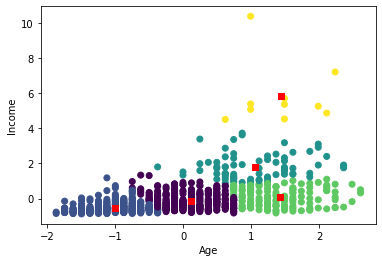

In [25]:
plt.scatter(df["Age"], df["Income"], c = labels.astype(float))
plt.xlabel("Age")
plt.ylabel("Income")
plt.scatter(centers[:,0], centers[:,1], c = "red", marker = "s")
plt.show()

In [26]:
k_means.inertia_     # SUM OF SQUARED DISTANCES OF SAMPLES TO THEIR CLOSEST CLUSTER CENTER(CENTROID)

319.12008212255205

In [34]:
cost = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(df)
    cost.append(kmeans.inertia_)

Text(0, 0.5, 'Inertia(Cost)')

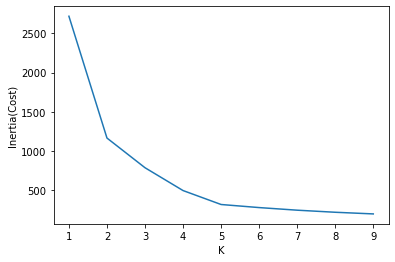

In [35]:
plt.plot(range(1, 10), cost)
plt.xlabel("K")
plt.ylabel("Inertia(Cost)")

In [36]:
!! cd

['C:\\Users\\nagal\\demo\\clustering\\Kmeans']